# Intuiciones sobre convoluciones



🎯 <b><u>Objetivos</u></b>
- **Escribamos operaciones convolucionales**
- **Visualicemos**
    - kernels de convolucion
    - los efectos de los kernels de convolucion aplicados a imagenes


## (0) El dataset

❓ Primero usemos la siguiente funcion `load_data` para cargar los datos ❓

* No modifique nada de la funcion!
* no modifique los shape o los outputs! Esto tendra un impacto en las siguientes preguntas.

In [ ]:
import os
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data("../Datasets/data")


❓ **preguntas sobre los shape (formas o dimension)** ❓

* Cuantas imagenes tenemos?
* Cuales osn sus dimensiones? 
* puede realizar algun comentario sobre los canales? 

(200, 76, 78, 1)

❓ **Preguntas sobre la normalizacion** ❓

Estas imagenes necesitan normalizacion? 

(0.0, 1.0)

❓ **Pregunta** : visualice algunas imagenes con `plt.imshow` y sus respectivos labels ❓

_Nota: las imagenes estan en blanco y negro, igualmente use`cmap = gray` en matplotlib_

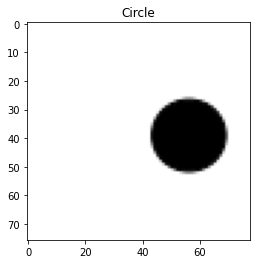

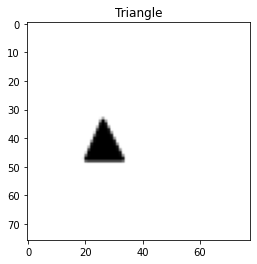

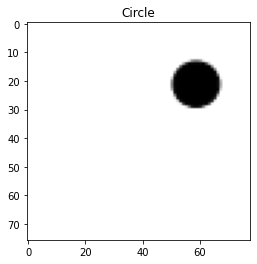

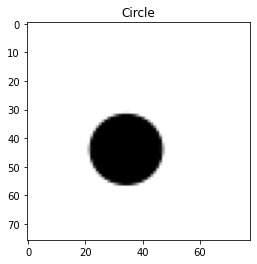

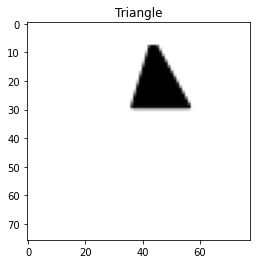

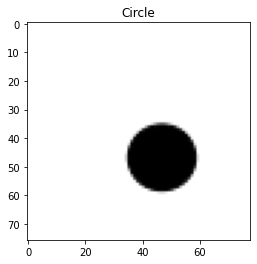

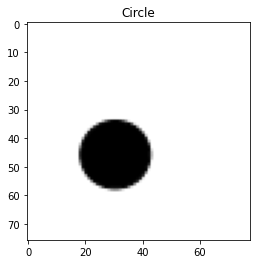

❓ **Cuantas clases categoricas vamos a predecir** ❓



(array([0, 1]), array([100, 100]))

## (1) Kernels

La siguietne funcion `compute_convolution` realiza una **opracion convolucional** esto aplica un kernel a la imagen.

❓ **Preguntas sobre la funcion `compute_convolution`** ❓

Ejecute la siguiente e intente comprender los diferentes pasos de la funcion.

In [ ]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height + 1):
        arr = []
        
        for y in range(img_width - kernel_width + 1):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ **Como la funcion  `compute_convolution`  funciona en la practica** ❓ 


* Elija cualquier imagen del dataset
* Apliquen le siguiente kernel en la imagen
* Visualice la imagen de entrada y la imagen de salida. 
* ve alguna diferencia?

In [ ]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

In [1]:
# Tu codigo

🎁 Creamos una funcion `plot_convolution` la cual retorna una imagen afectanda por la imagen de entrada y el kernel .

 `plot_convolution` con el `kernel_1` 

Apliquelo al triangulo y al circulo.

In [ ]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [ ]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

In [ ]:
# Tu codigo



- Ejecute la funcion `plot_convolution` con `activation` como `True` (la funcion de activacion es una relu).

In [ ]:
# Tu codigo

👆 This kernel is actually highlighting the edges in a given direction. 

❓ **Juguemos con diferentes kernels...** ❓

TLos siguientes kernels, generaran diferentes efectos.

In [ ]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

In [ ]:
#Tu codigo

❓ **Que fecto tendra el tamaño del kernel** ❓

Intentemos con _kernel_big_.

In [ ]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])

kernel_big

In [ ]:
# Tu codigo

❓ **Intentemos con otro kernel**  ❓

In [ ]:
random_kernel = np.random.uniform(-10, 10, (5, 5))
# Tu codigo

Now that you've got the idea of what a convolution operation does to an image, let's see how it goes with a "real" Convolutional Neural Network. ✅

## (2) Convolutional Neural Network

### (2.1) Arquitectura y entrenamiento


❓ **Diseñemos una CNN** ❓

escribamos la siguiente CNN como: 
- a Convolutional Layer con 16 filters con $ (4, 4) $ kernels.
- a Convolutional Layer con 32 filters con $ (3, 3) $ kernels.
- a Convolutional Layer con 64 filters con $ (3, 3) $ kernels.
- a Convolutional Layer con 64 filters con $ (2, 2) $ kernels.

con:
- A Max-Pooling Layer (con un $ (2, 2) $ pool-size) despues de cada convolucion.
- Un Hidden Dense Layer con un tamaño a eleccion, sea resonable:
    - despues l aparte flattening  
    - pero antes del ultimo layer

Tambien, asegurese de compilar su modelo con los parametros apropiados

In [ ]:
from tensorflow.keras import layers, models

def initialize_model():
    
    pass # aqui empieza su codigo 
    
    return model



* Fitear el modelo. Deberia haber alcanzado un accuracy al menos de 90%. 

   

In [2]:
# Tu codigo

🎁 Codeamos un `plot_loss_accuracy` para vos.

❓ **El modelo CNN converge** ❓

_Ves algun indicio de sobreajuste (overfitting)?_

In [ ]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

In [3]:
# Tu codigo

### (2.2) Entendimiento profundo de  CNN

🕵️‍♀️ Con la siguiente tabla, tebdras una observacion de los diferentes pesos, kernels y filtros involucrados en el CNN que construiste anteriormente:

| layer_number | convolution_layer | kernel_number | channel_number |
|--------------|-------------------|---------------|----------------|
| 0            | conv2D no 1       | 16            | 1              |
| 2            | conv2D no 2       | 32            | 16             |
| 4            | conv2D no 3       | 64            | 32             |
| 8            | conv2D no 4       | 64            | 64             |

#### (2.2.1) Kernels

👩🏻‍🏫 Para cualquier red neuronal sequencial (Dense or Convolutional), debes:
- imprimir el **`.summary()`** para visualizar capas y el numero de pesos/parametros involucrados
- acceder a diferentes **`.layers`** de tu modelo
- acceder a los diferentes parametros **`.weights`** de la capa

❓ **Enlista las dierentes capas de tu modelos CNN** ❓

In [4]:
# tu codigo

❓ **intente acceder a la matriz de peso `w` de tu primer capa convolucional, luego a la segunda** ❓  
pista: los parametros de capas consisten de la matriz de peso y los ajustes (w, b)

In [5]:
# tu codigo

❓ **Que representan sus shapes** ❓

In [ ]:
# REspuesta

❓ **Visualicemos la primer capa** ❓ 

La imagen original posee 1 canal.. y nosotros creamos 16 salidas usando 16 kernels!

🪄 Usando `plot_convolution(activation = True)`, visualice algunos kernels de la primer capa convolucional, junto con la activacion de salida, para ver que aprendio el modelo de las imagenes en esta capa.

In [6]:
# tu codigo

#### (2.2.2) Activaciones

<u><i>Paso 1: enlistar las  11 capas de salida de tu CNN</i></u>

In [ ]:
layers_outputs = [layer.output for layer in model.layers]
layers_outputs

<u><i>Paso 2: instanciar 11 sub-modelos re-utilizando oesis y ajustes entrenados</i></u> 
- layer1
- layer1 $ \Rightarrow $ layer2
- layer1 $ \Rightarrow $ layer2 $ \Rightarrow $ layer3
- ... 

In [ ]:
from tensorflow.keras import Model

In [ ]:
activation_models = [Model(inputs=model.input, outputs=output) for output in layers_outputs]

<u><i>paso 3: ingresar los outputs de cada submodelo</i></u>

In [ ]:
activations = [m.predict(X) for m in activation_models]
len(activations)

👇 Pro tips  En tensorflow, puedes crear un solo modelos para muchos outputs para evitar los loops de python 

In [ ]:
layers_outputs = [layer.output for layer in model.layers] # same as above
activation_model = Model(inputs=model.input, outputs=layers_outputs) # model with many outputs !
activations = activation_model.predict(X) # 11 predictions at once!

❓ **Ahora ingresamos las activaciones, elegimos una imagen y visualizamos la activacion de las "imagenes" para cada capa convolucional** ❓ 


In [7]:
# tu codigo